In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head(5)

,id,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease
0,0,60,Male,2.9,1.3,170.9,42.1,37.1,5.5,2.9,1.01,1
1,1,28,Female,0.7,0.1,158.8,26.0,23.9,6.4,3.7,1.36,0
2,2,60,Male,23.1,12.5,962.0,53.0,40.9,6.8,3.3,0.96,1
3,3,20,Male,1.0,0.5,415.9,33.9,39.0,7.0,3.8,1.31,0
4,4,44,Female,0.6,0.3,152.9,40.9,42.0,4.5,2.1,1.04,0


In [15]:
train.isnull().sum()

id          0
Age         0
Gender      0
T_Bil       0
D_Bil       0
ALP         0
ALT_GPT     0
AST_GOT     0
TP          0
Alb         0
AG_ratio    0
disease     0
dtype: int64

In [9]:
test.isnull().sum()

id          0
Age         0
Gender      0
T_Bil       0
D_Bil       0
ALP         0
ALT_GPT     0
AST_GOT     0
TP          0
Alb         0
AG_ratio    0
dtype: int64

In [19]:
train.dtypes

id            int64
Age           int64
Gender       object
T_Bil       float64
D_Bil       float64
ALP         float64
ALT_GPT     float64
AST_GOT     float64
TP          float64
Alb         float64
AG_ratio    float64
disease       int64
dtype: object

In [7]:
print(train.shape)
print(test.shape)

(891, 12)
(382, 11)


In [14]:
train = train.dropna(subset=['AG_ratio'])

In [ ]:
columns = ['Age','T_Bil','D_Bil','ALP','ALT_GPT','AST_GOT','TP','Alb','AG_ratio']

# 数値データのみを抽出
numeric_data = train[columns].select_dtypes(include='number')

# 相関行列を計算
correlation_matrix = numeric_data.corr()


# 相関グラフを描画
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

# 'disease'が0と1で色分けされた散布図を描画
for column1 in columns:
    for column2 in columns:
        plt.scatter(train[column1], train[column2], c=train['disease'], cmap='bwr')
        plt.xlabel(column1)
        plt.ylabel(column2)
        plt.title('Scatter Plot with Color Coding')
        plt.show()


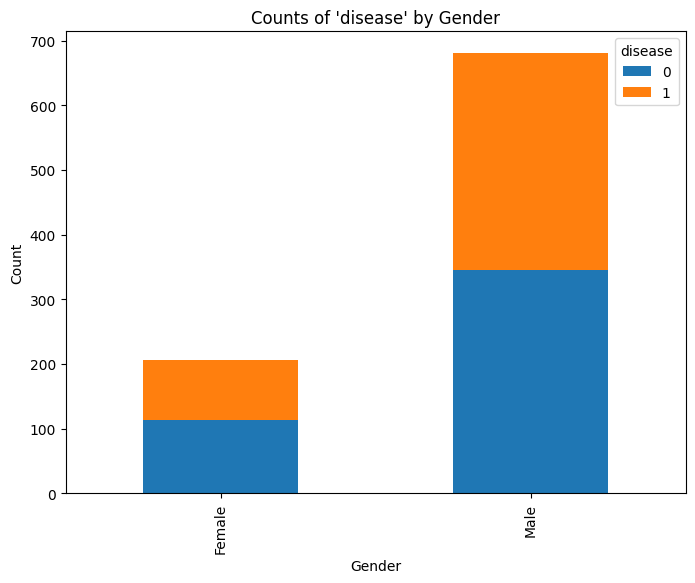

In [24]:
# 性別ごとに['disease']が0と1のデータの数を計算
gender_counts = train.groupby(['Gender', 'disease']).size().unstack()

# 棒グラフを描画
fig, ax = plt.subplots(figsize=(8, 6))
gender_counts.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title("Counts of 'disease' by Gender")
plt.show()

In [25]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoderを作成
encoder = LabelEncoder()

train['Gender_encoded'] = encoder.fit_transform(train['Gender'])

train.head(5)

,id,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease,Gender_encoded
0,0,60,Male,2.9,1.3,170.9,42.1,37.1,5.5,2.9,1.01,1,1
1,1,28,Female,0.7,0.1,158.8,26.0,23.9,6.4,3.7,1.36,0,0
2,2,60,Male,23.1,12.5,962.0,53.0,40.9,6.8,3.3,0.96,1,1
3,3,20,Male,1.0,0.5,415.9,33.9,39.0,7.0,3.8,1.31,0,1
4,4,44,Female,0.6,0.3,152.9,40.9,42.0,4.5,2.1,1.04,0,0


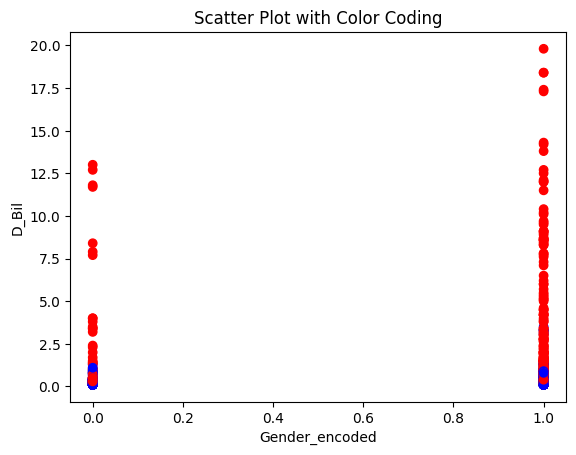

In [26]:
plt.scatter(train['Gender_encoded'], train['D_Bil'], c=train['disease'], cmap='bwr')
plt.xlabel('Gender_encoded')
plt.ylabel('D_Bil')
plt.title('Scatter Plot with Color Coding')
plt.show()

In [67]:
filter_data = train[train['disease']==0]
filter_value={}
filter=""

columns = ['Age','T_Bil','D_Bil','ALP','ALT_GPT','AST_GOT','TP','Alb','AG_ratio']

for column in columns:
    max_value = filter_data[column].max()
    print("{}の最大値: {}".format(column, str(max_value)))
    filter_value[column] = max_value + max_value/4
    print("{}のフィルター: {}".format(column, str(filter_value[column])))
    if column=='Age':
        filter = "(train['{}']<={})".format(column,filter_value[column])
    else:
        filter = filter + "&(train['{}']<={})".format(column,filter_value[column])
    
print(filter)
    

Ageの最大値: 84
Ageのフィルター: 105.0
T_Bilの最大値: 7.0
T_Bilのフィルター: 8.75
D_Bilの最大値: 3.5
D_Bilのフィルター: 4.375
ALPの最大値: 1051.0
ALPのフィルター: 1313.75
ALT_GPTの最大値: 159.8
ALT_GPTのフィルター: 199.75
AST_GOTの最大値: 230.9
AST_GOTのフィルター: 288.625
TPの最大値: 9.3
TPのフィルター: 11.625
Albの最大値: 5.0
Albのフィルター: 6.25
AG_ratioの最大値: 2.01
AG_ratioのフィルター: 2.5124999999999997
(train['Age']<=105.0)&(train['T_Bil']<=8.75)&(train['D_Bil']<=4.375)&(train['ALP']<=1313.75)&(train['ALT_GPT']<=199.75)&(train['AST_GOT']<=288.625)&(train['TP']<=11.625)&(train['Alb']<=6.25)&(train['AG_ratio']<=2.5124999999999997)


In [68]:
disease_filter_data=train[(train['Age']<=105.0)&(train['T_Bil']<=8.75)&(train['D_Bil']<=4.375)&(train['ALP']<=1313.75)&(train['ALT_GPT']<=199.75)&(train['AST_GOT']<=288.625)&(train['TP']<=11.625)&(train['Alb']<=6.25)&(train['AG_ratio']<=2.5124999999999997)]

In [69]:
X = disease_filter_data.drop(["disease","id","Gender"], axis=1).values
y = disease_filter_data["disease"].values

In [101]:
#標準化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

クロスバリテーション

In [106]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr_pred = cross_val_predict(lr, X, y, cv=5)
lr.fit(X,y)
accuracy_score(y, lr_pred)
recall_score(y, lr_pred, average="binary")

0.5372670807453416

In [107]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc_pred = cross_val_predict(rfc, X, y, cv=5)
rfc.fit(X, y)
accuracy_score(y, rfc_pred)

0.8756410256410256

In [108]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=0)
xgb_pred = cross_val_predict(xgb, X, y, cv=5)
xgb.fit(X,y)
accuracy_score(y, xgb_pred)

0.8653846153846154

In [110]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# インスタンス
knn = KNeighborsClassifier(n_neighbors=3)

# モデル学習
knn.fit(X,y)

knn_pred = cross_val_predict(knn, X, y, cv=5)
accuracy_score(y, knn_pred)

0.7807692307692308

In [111]:
pred = (rfc_pred + xgb_pred + knn_pred) / 3
accuracy_score(y, pred.round())

0.8769230769230769

In [112]:
print(pred)

[1.         0.         0.66666667 0.         0.         0.
 0.66666667 0.         1.         0.         0.         0.66666667
 1.         0.         0.66666667 0.         0.         0.66666667
 1.         1.         0.66666667 1.         0.         0.
 1.         0.         0.         1.         0.         0.
 0.         0.66666667 0.         0.66666667 0.         1.
 0.         0.66666667 1.         0.66666667 0.         0.33333333
 0.         1.         0.66666667 0.         0.         0.
 0.33333333 1.         1.         0.         0.33333333 1.
 0.         0.         0.         0.33333333 0.66666667 0.
 0.         0.         0.         0.33333333 0.33333333 0.66666667
 1.         0.         0.         0.33333333 0.66666667 1.
 0.         0.         1.         0.33333333 0.66666667 0.
 1.         0.         0.         1.         0.         1.
 1.         0.         0.33333333 0.66666667 1.         0.33333333
 0.         0.66666667 0.33333333 0.         0.         0.
 0.33333333 0.  

In [113]:
filter_data = train[train['disease']==0]
filter_value={}
filter=""

columns = ['Age','T_Bil','D_Bil','ALP','ALT_GPT','AST_GOT','TP','Alb','AG_ratio']

for column in columns:
    max_value = filter_data[column].max()
    print("{}の最大値: {}".format(column, str(max_value)))
    filter_value[column] = max_value + max_value/4
    print("{}のフィルター: {}".format(column, str(filter_value[column])))
    if column=='Age':
        filter = "(test['{}']<={})".format(column,filter_value[column])
    else:
        filter = filter + "&(test['{}']<={})".format(column,filter_value[column])
    
print(filter)


    

Ageの最大値: 84
Ageのフィルター: 105.0
T_Bilの最大値: 7.0
T_Bilのフィルター: 8.75
D_Bilの最大値: 3.5
D_Bilのフィルター: 4.375
ALPの最大値: 1051.0
ALPのフィルター: 1313.75
ALT_GPTの最大値: 159.8
ALT_GPTのフィルター: 199.75
AST_GOTの最大値: 230.9
AST_GOTのフィルター: 288.625
TPの最大値: 9.3
TPのフィルター: 11.625
Albの最大値: 5.0
Albのフィルター: 6.25
AG_ratioの最大値: 2.01
AG_ratioのフィルター: 2.5124999999999997
(test['Age']<=105.0)&(test['T_Bil']<=8.75)&(test['D_Bil']<=4.375)&(test['ALP']<=1313.75)&(test['ALT_GPT']<=199.75)&(test['AST_GOT']<=288.625)&(test['TP']<=11.625)&(test['Alb']<=6.25)&(test['AG_ratio']<=2.5124999999999997)


In [194]:
filter_test_df = test[(test['Age']<=105.0)&(test['T_Bil']<=8.75)&(test['D_Bil']<=4.375)&(test['ALP']<=1313.75)&(test['ALT_GPT']<=199.75)&(test['AST_GOT']<=288.625)&(test['TP']<=11.625)&(test['Alb']<=6.25)&(test['AG_ratio']<=2.5124999999999997)]
nofilter_test_df = test[(test['Age']>105.0)|(test['T_Bil']>8.75)|(test['D_Bil']>4.375)|(test['ALP']>1313.75)|(test['ALT_GPT']>199.75)|(test['AST_GOT']>288.625)|(test['TP']>11.625)|(test['Alb']>6.25)|(test['AG_ratio']>2.5124999999999997)]

In [195]:
print(test.shape)
print(filter_test_df.shape)
print(nofilter_test_df.shape)

(382, 11)
(343, 11)
(39, 11)


In [196]:
test_id = filter_test_df['id']
filter_test_df = filter_test_df.drop(['Gender','id'],axis=1)


In [197]:
test_id = test_id.reset_index()


In [198]:
test_id

,index,id
0,0,891
1,1,892
2,2,893
3,4,895
4,5,896
...,...,...
338,377,1268
339,378,1269
340,379,1270
341,380,1271


In [199]:
filter_test_df = pd.DataFrame(scaler.fit_transform(filter_test_df),columns = ['Age','T_Bil','D_Bil','ALP','ALT_GPT','AST_GOT','TP','Alb','AG_ratio'])

In [200]:
filter_test_df

,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio
0,1.349322,-0.599836,-0.546694,-0.513522,-0.480230,-0.628193,-0.126151,0.012767,-0.348917
1,0.199841,-0.164676,-0.382781,0.214041,-0.011138,-0.432713,1.335666,0.638374,-0.314086
2,-1.010140,-0.599836,-0.710606,0.058790,-0.565253,-0.557331,-1.198150,-1.363568,-1.498331
3,0.199841,-0.599836,-0.546694,0.008686,-0.887754,-0.799238,0.263667,-0.362597,-1.010701
4,0.441837,1.140805,0.764606,2.647955,-0.685458,-0.432713,0.556030,-0.863082,-1.533162
...,...,...,...,...,...,...,...,...,...
338,-0.344650,-0.338740,-0.218869,0.058790,0.284977,1.351041,0.556030,0.638374,0.521852
339,0.199841,-0.512804,-0.546694,-0.392849,-0.597503,0.278345,-0.028697,0.137889,0.904990
340,0.260340,-0.512804,-0.382781,0.644510,-0.339502,-0.699054,2.115301,2.890559,2.228558
341,-0.042155,-0.425772,-0.710606,-0.491646,-0.392275,-0.408278,1.920393,1.389103,0.069052


In [201]:
filter_test_df = pd.concat([test_id, filter_test_df], axis=1)

In [204]:
filter_test_df = filter_test_df.drop(['index'],axis=1)

In [ ]:
columns = ['Age','T_Bil','D_Bil','ALP','ALT_GPT','AST_GOT','TP','Alb','AG_ratio']


for column1 in columns:
    for column2 in columns:
        plt.scatter(filter_test_df[column1], filter_test_df[column2], cmap='bwr')
        plt.xlabel(column1)
        plt.ylabel(column2)
        plt.title('Scatter Plot with Color Coding')
        plt.show()

In [205]:
pred_knn = knn.predict(filter_test_df)
pred_xgb = xgb.predict(filter_test_df)
pred_rfc = rfc.predict(filter_test_df)

/Users/ishikawaritsuki/Desktop/kaggle/newyork_taxi/.venv/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/ishikawaritsuki/Desktop/kaggle/newyork_taxi/.venv/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [206]:
test_pred = (pred_rfc + pred_xgb + pred_knn) / 3
for i in range(len(test_pred)):
    if test_pred[i] > 0.5:
        test_pred[i] = 1
    else:
        test_pred[i] = 0

print(test_pred)

[1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1.
 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0.
 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0.

In [134]:
filter_test_df = pd.DataFrame(filter_test_df)

In [207]:
filter_test_df['disease'] = test_pred.astype(int)
filter_test_df


,id,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease
0,891,1.349322,-0.599836,-0.546694,-0.513522,-0.480230,-0.628193,-0.126151,0.012767,-0.348917,1
1,892,0.199841,-0.164676,-0.382781,0.214041,-0.011138,-0.432713,1.335666,0.638374,-0.314086,1
2,893,-1.010140,-0.599836,-0.710606,0.058790,-0.565253,-0.557331,-1.198150,-1.363568,-1.498331,0
3,895,0.199841,-0.599836,-0.546694,0.008686,-0.887754,-0.799238,0.263667,-0.362597,-1.010701,1
4,896,0.441837,1.140805,0.764606,2.647955,-0.685458,-0.432713,0.556030,-0.863082,-1.533162,1
...,...,...,...,...,...,...,...,...,...,...,...
338,1268,-0.344650,-0.338740,-0.218869,0.058790,0.284977,1.351041,0.556030,0.638374,0.521852,1
339,1269,0.199841,-0.512804,-0.546694,-0.392849,-0.597503,0.278345,-0.028697,0.137889,0.904990,1
340,1270,0.260340,-0.512804,-0.382781,0.644510,-0.339502,-0.699054,2.115301,2.890559,2.228558,1
341,1271,-0.042155,-0.425772,-0.710606,-0.491646,-0.392275,-0.408278,1.920393,1.389103,0.069052,1


In [208]:
nofilter_test_df['disease'] = 1

/var/folders/5x/f6ds179521j382hhjsp146x80000gn/T/ipykernel_42796/3877097411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nofilter_test_df['disease'] = 1


In [211]:
predict_df = pd.concat([nofilter_test_df, filter_test_df], axis=0)

In [213]:
predict_df = predict_df.sort_values('id')

In [214]:
predict_df

,id,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease
0,891,1.349322,NaN,-0.599836,-0.546694,-0.513522,-0.480230,-0.628193,-0.126151,0.012767,-0.348917,1
1,892,0.199841,NaN,-0.164676,-0.382781,0.214041,-0.011138,-0.432713,1.335666,0.638374,-0.314086,1
2,893,-1.010140,NaN,-0.599836,-0.710606,0.058790,-0.565253,-0.557331,-1.198150,-1.363568,-1.498331,0
3,894,38.000000,Male,3.500000,1.700000,253.000000,80.000000,406.000000,6.800000,3.700000,1.330000,1
3,895,0.199841,NaN,-0.599836,-0.546694,0.008686,-0.887754,-0.799238,0.263667,-0.362597,-1.010701,1
...,...,...,...,...,...,...,...,...,...,...,...,...
338,1268,-0.344650,NaN,-0.338740,-0.218869,0.058790,0.284977,1.351041,0.556030,0.638374,0.521852,1
339,1269,0.199841,NaN,-0.512804,-0.546694,-0.392849,-0.597503,0.278345,-0.028697,0.137889,0.904990,1
340,1270,0.260340,NaN,-0.512804,-0.382781,0.644510,-0.339502,-0.699054,2.115301,2.890559,2.228558,1
341,1271,-0.042155,NaN,-0.425772,-0.710606,-0.491646,-0.392275,-0.408278,1.920393,1.389103,0.069052,1


In [217]:
submit_df = predict_df[['id','disease']]

In [218]:
submit_df

,id,disease
0,891,1
1,892,1
2,893,0
3,894,1
3,895,1
...,...,...
338,1268,1
339,1269,1
340,1270,1
341,1271,1


In [ ]:
submit_df.to_csv('submission.csv',index=False,header=None)